1: Import Necessary Libraries

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, SimpleRNN
from tensorflow.keras.utils import to_categorical
import shap
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import joblib

2: Data Preparation with SMOTE

In [3]:
# Load the dataset
data = pd.read_csv('../../src/data/e-commerce_processed_data.csv')

# Feature and Target Separation
X = data.drop(columns=['class'])
y = data['class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution before SMOTE:
class
0    108786
1     11250
Name: count, dtype: int64
Class distribution after SMOTE:
class
0    108786
1    108786
Name: count, dtype: int64


3: Model Training

Traditional Machine Learning Models

In [ ]:
# Initialize and train the models
lr_model = LogisticRegression(max_iter=1000, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42)

# Train the models
lr_model.fit(X_train_smote, y_train_smote)
dt_model.fit(X_train_smote, y_train_smote)
rf_model.fit(X_train_smote, y_train_smote)
gb_model.fit(X_train_smote, y_train_smote)
mlp_model.fit(X_train_smote, y_train_smote)

MLPClassifier(random_state=42)

Neural Network Models

In [5]:
# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_smote.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_smote.values.reshape(-1, X_train_smote.shape[1], 1), to_categorical(y_train_smote), epochs=10, batch_size=32, validation_data=(X_test.values.reshape(-1, X_test.shape[1], 1), to_categorical(y_test)))

# Build the RNN model
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(X_train_smote.shape[1], 1), activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_smote.values.reshape(-1, X_train_smote.shape[1], 1), to_categorical(y_train_smote), epochs=10, batch_size=32, validation_data=(X_test.values.reshape(-1, X_test.shape[1], 1), to_categorical(y_test)))

# Build the LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_smote.shape[1], 1), activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_smote.values.reshape(-1, X_train_smote.shape[1], 1), to_categorical(y_train_smote), epochs=10, batch_size=32, validation_data=(X_test.values.reshape(-1, X_test.shape[1], 1), to_categorical(y_test)))

e:\OnlineClass\AIM\Fraud_Detection_ML_Model_in_E-commerce_and_Credit_Card_Transactions\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.7441 - loss: 0.5090 - val_accuracy: 0.9556 - val_loss: 0.2908
Epoch 2/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7728 - loss: 0.4442 - val_accuracy: 0.8863 - val_loss: 0.4734
Epoch 3/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7780 - loss: 0.4378 - val_accuracy: 0.9482 - val_loss: 0.3217
Epoch 4/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7837 - loss: 0.4300 - val_accuracy: 0.9442 - val_loss: 0.4111
Epoch 5/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7877 - loss: 0.4233 - val_accuracy: 0.9458 - val_loss: 0.3839
Epoch 6/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7952 - loss: 0.4138 - val_accuracy: 0.9442 - val_loss: 0.3487
Epoch 7/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7959 - loss: 0.4102 - val_accuracy: 0.9517 - val_loss: 0.3485
Epoch 8/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7972 - loss: 0

e:\OnlineClass\AIM\Fraud_Detection_ML_Model_in_E-commerce_and_Credit_Card_Transactions\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.7610 - loss: 0.4714 - val_accuracy: 0.9562 - val_loss: 0.4026
Epoch 2/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.7673 - loss: 0.4563 - val_accuracy: 0.9561 - val_loss: 0.3711
Epoch 3/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.7698 - loss: 0.4537 - val_accuracy: 0.9560 - val_loss: 0.3911
Epoch 4/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7698 - loss: 0.4531 - val_accuracy: 0.9561 - val_loss: 0.3947
Epoch 5/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.7673 - loss: 0.4537 - val_accuracy: 0.9557 - val_loss: 0.3965
Epoch 6/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.7687 - loss: 0.4520 - val_accuracy: 0.9561 - val_loss: 0.3883
Epoch 7/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.7691 - loss: 0.4515 - val_accuracy: 0.9537 - val_loss: 0.4048
Epoch 8/10
6800/6800 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.7674 - loss: 0

4: Model Evaluation

In [8]:
# Import necessary libraries for evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the models to be evaluated
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Multi-Layer Perceptron": mlp_model
}

evaluation_results = []

# Evaluate traditional machine learning models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results.append({
        "Model": model_name,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Accuracy": accuracy
    })

# Evaluate neural network models
nn_models = {
    "CNN": cnn_model,
    "RNN": rnn_model,
    "LSTM": lstm_model
}

for model_name, model in nn_models.items():
    y_pred_prob = model.predict(X_test.values.reshape(-1, X_test.shape[1], 1))
    y_pred = np.argmax(y_pred_prob, axis=1)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results.append({
        "Model": model_name,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Accuracy": accuracy
    })

# Create DataFrame for evaluation results
evaluation_df = pd.DataFrame(evaluation_results)

# Display the combined evaluation results in tabular form
print("\nEvaluation Results for All Models:")
print(evaluation_df.to_string(index=False))

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

Evaluation Results for All Models:
                 Model  Precision   Recall  F1-Score  Accuracy
   Logistic Regression   0.946027 0.949082  0.943539  0.949082
         Decision Tree   0.906498 0.894598  0.899808  0.894598
         Random Forest   0.953252 0.953547  0.947555  0.953547
     Gradient Boosting   0.958133 0.956180  0.950004  0.956180
Multi-Layer Perceptron   0.940578 0.945083  0.939949  0.945083
                   CNN   0.935994 0.941218  0.936683  0.941218
                   RNN   0.939447 0.944183  0.939225  0.944183
                  LSTM   0.930374 0.935653  0.931993  0.935653


5. Model Explainability

5.1 Using SHAP

SHAP Summary Plot

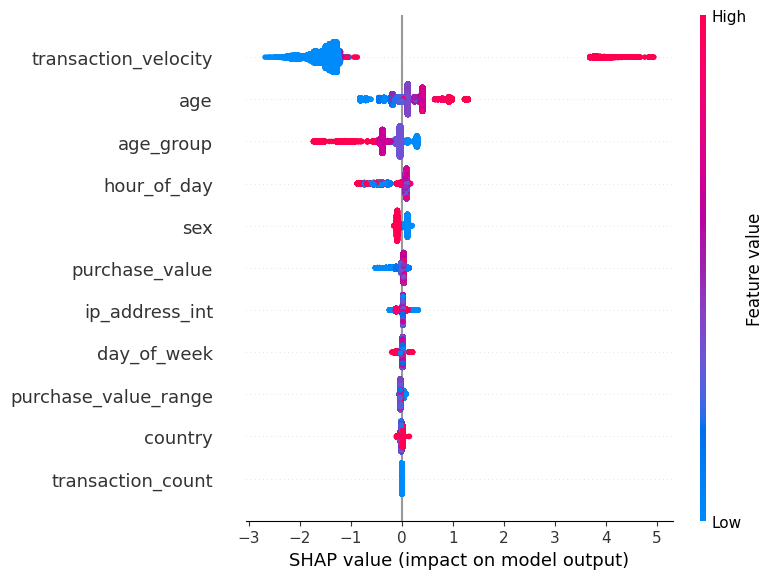

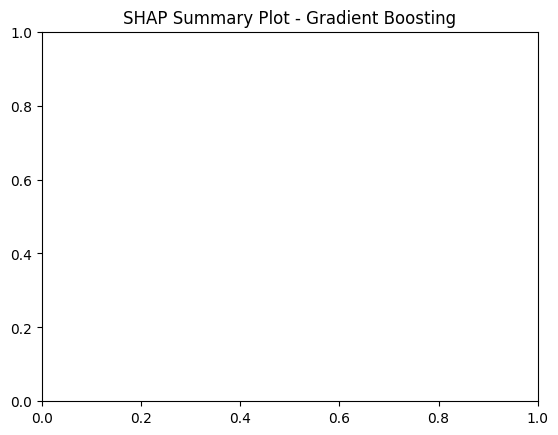

In [12]:
# Initialize SHAP explainer for Gradient Boosting model
explainer_gb = shap.TreeExplainer(gb_model)
shap_values_gb = explainer_gb.shap_values(X_test, check_additivity=False)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_gb, X_test)
plt.title('SHAP Summary Plot - Gradient Boosting')
plt.show()

SHAP Force Plot for a single prediction

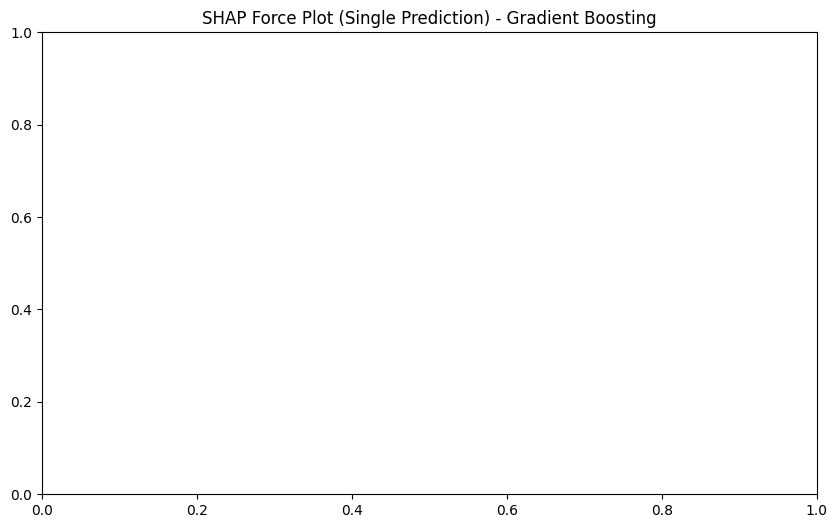

In [13]:
# SHAP Force Plot for a single prediction
shap.initjs()
plt.figure(figsize=(10, 6))
shap.force_plot(explainer_gb.expected_value, shap_values_gb[0], X_test.iloc[0,:])
plt.title('SHAP Force Plot (Single Prediction) - Gradient Boosting')
plt.show()

SHAP Dependence Plot for all features

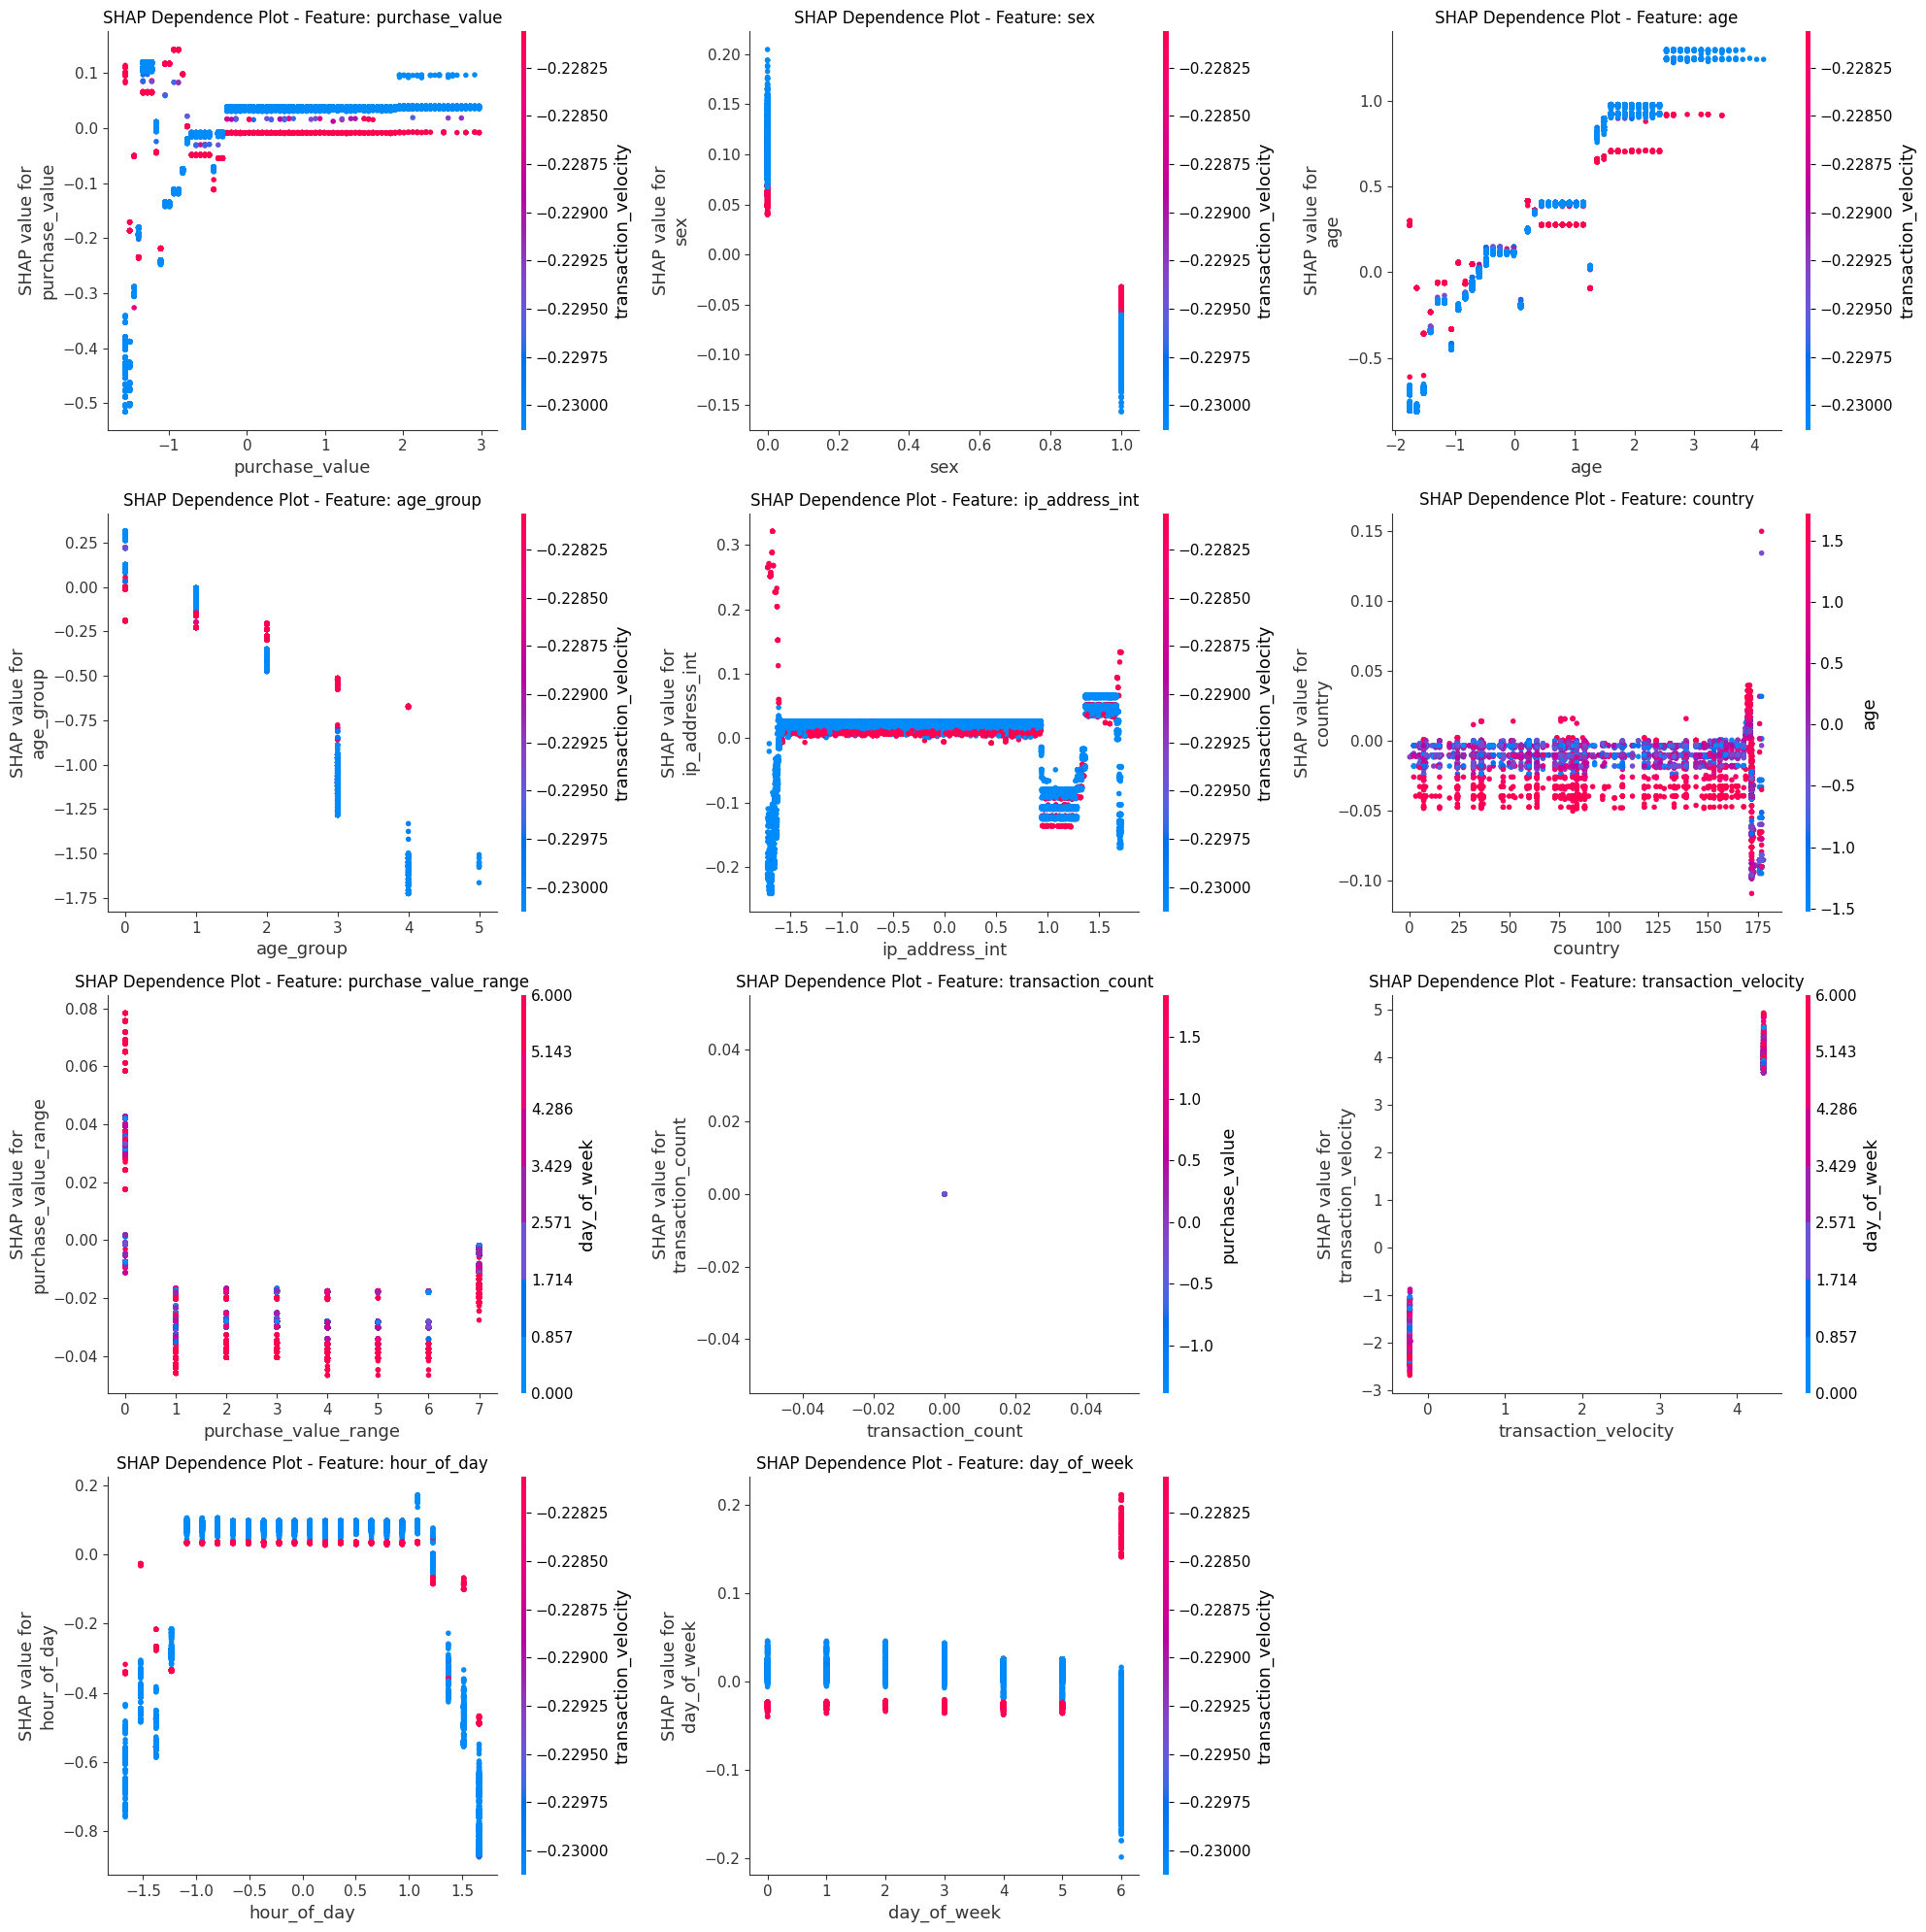

In [16]:
# Initialize SHAP explainer for Gradient Boosting model
explainer_gb = shap.TreeExplainer(gb_model)
shap_values_gb = explainer_gb.shap_values(X_test, check_additivity=False)

# Number of features to plot
num_features = len(X_test.columns)
num_rows = (num_features // 3) + 1  # Adjust the number of rows for the grid

# Create a figure for the combined SHAP Dependence Plots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot SHAP Dependence Plots for all features
for i, feature in enumerate(X_test.columns):
    shap.dependence_plot(feature, shap_values_gb, X_test, show=False, ax=axes[i])
    axes[i].set_title(f'SHAP Dependence Plot - Feature: {feature}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

5.2: Using LIME

e:\OnlineClass\AIM\Fraud_Detection_ML_Model_in_E-commerce_and_Credit_Card_Transactions\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


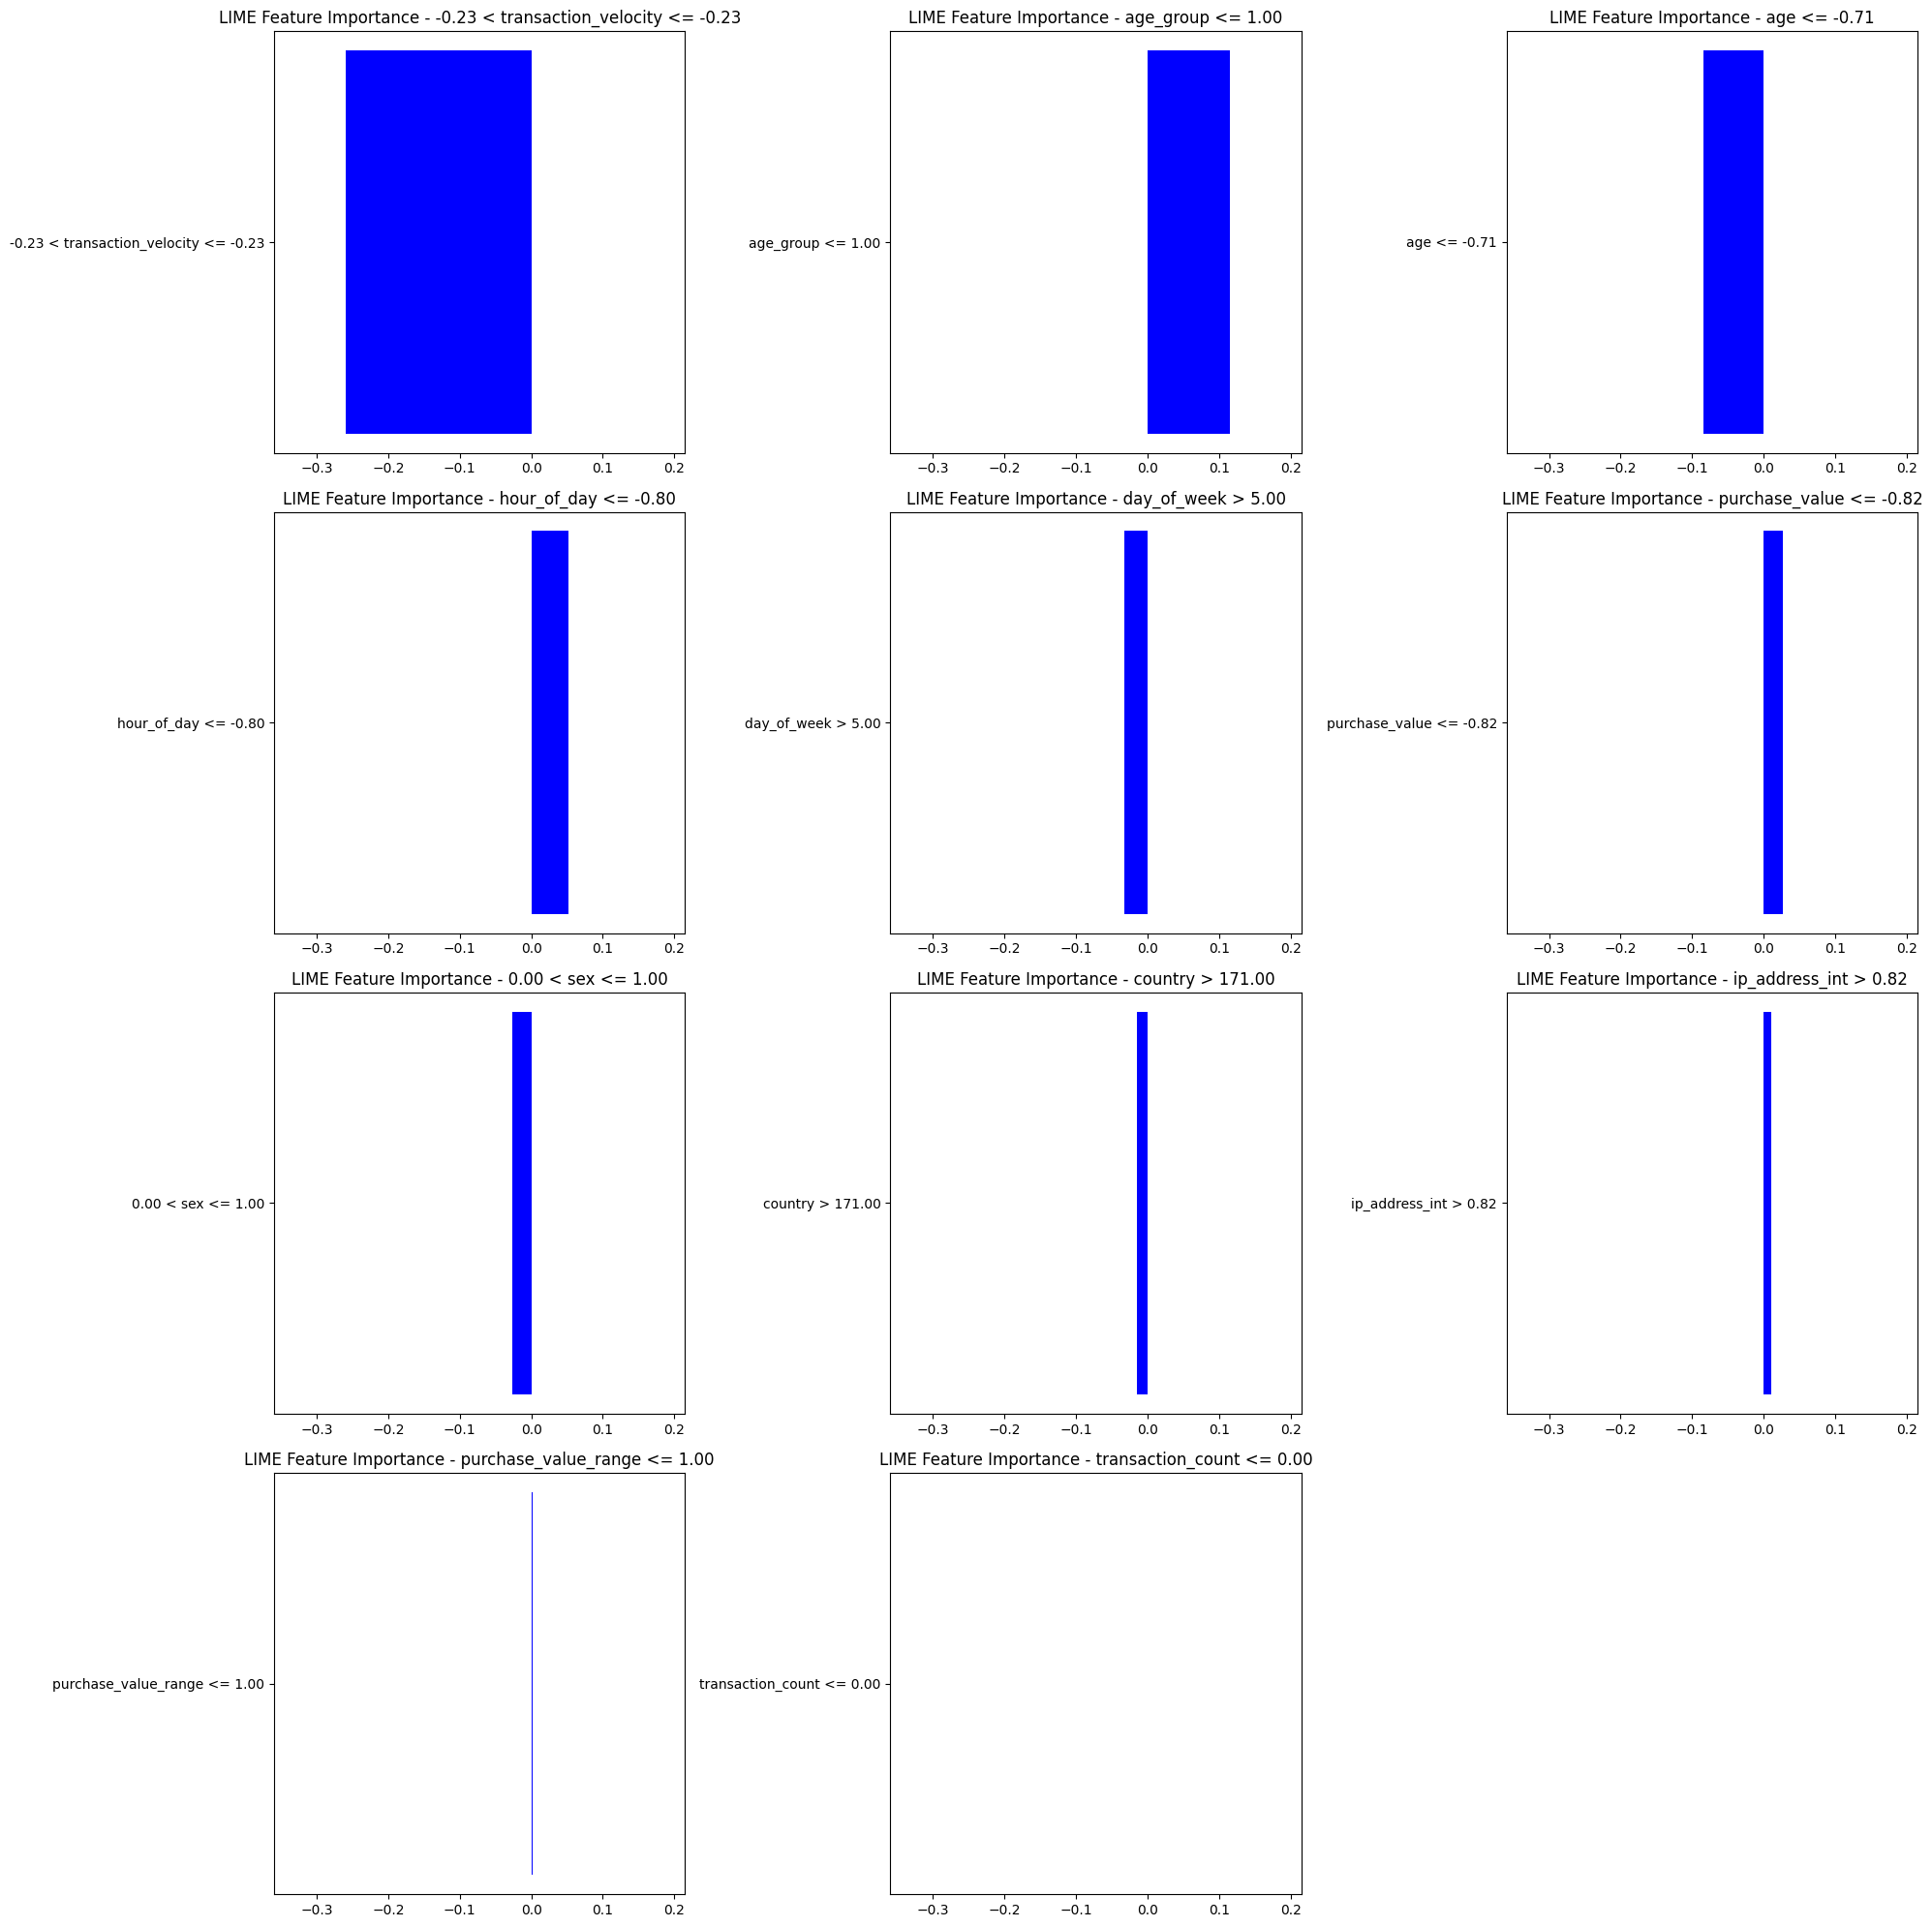

In [25]:
# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(X_train_smote.values, feature_names=X_train_smote.columns, class_names=['Non-Fraud', 'Fraud'], mode='classification')

# Explain a prediction for Gradient Boosting
exp_gb = lime_explainer.explain_instance(X_test.iloc[0].values, gb_model.predict_proba, num_features=len(X_test.columns))

# Number of features to plot
num_features = len(X_test.columns)
num_rows = (num_features // 3) + 1  # Adjust the number of rows for the grid

# Create a figure for the combined LIME Feature Importance Plots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot LIME Feature Importance for each feature using text and bar chart data
for i, (feature, weight) in enumerate(exp_gb.as_list()):
    axes[i].barh([feature], [weight], color='b')
    axes[i].set_title(f'LIME Feature Importance - {feature}')
    axes[i].set_xlim(left=min([x[1] for x in exp_gb.as_list()]) - 0.1, right=max([x[1] for x in exp_gb.as_list()]) + 0.1)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

6: Feature Importance

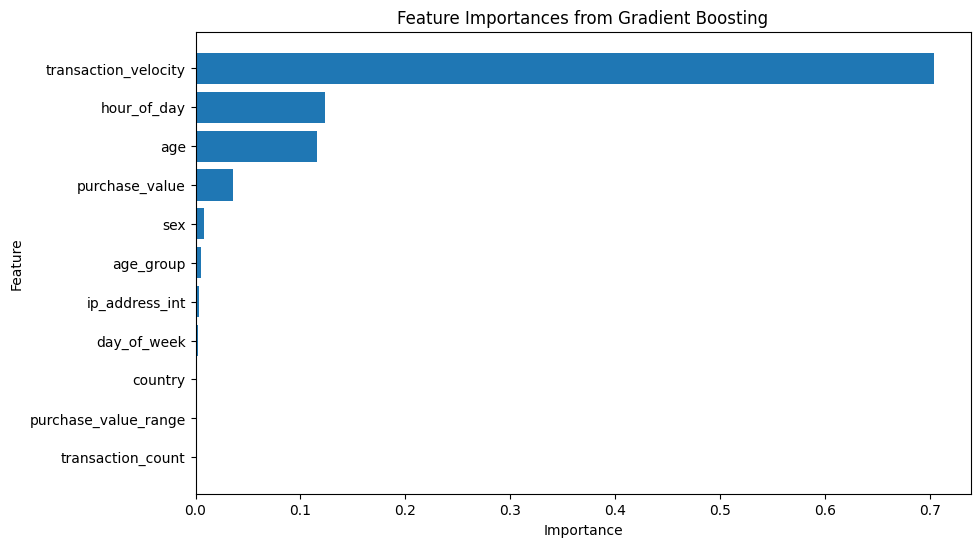

Feature Importances:
                 Feature  Importance
8   transaction_velocity    0.703570
9            hour_of_day    0.123792
2                    age    0.116197
0         purchase_value    0.035650
1                    sex    0.008258
3              age_group    0.004999
4         ip_address_int    0.003120
10           day_of_week    0.002808
5                country    0.001074
6   purchase_value_range    0.000533
7      transaction_count    0.000000


In [20]:
# Calculate feature importances from the Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances from Gradient Boosting')
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

7. Rebuild and evalute the model after dropping low-importance features, and compare with the original Gradient Boosting model

In [33]:
# Re-evaluate the original Gradient Boosting model
y_pred_original = gb_model.predict(X_test)
report_original = classification_report(y_test, y_pred_original, output_dict=True)

# Collect evaluation results for the original model
evaluation_results_original = {
    "Model": "Gradient Boosting (Original Features)",
    "Precision": report_original["weighted avg"]["precision"],
    "Recall": report_original["weighted avg"]["recall"],
    "F1-Score": report_original["weighted avg"]["f1-score"],
    "Accuracy": accuracy_score(y_test, y_pred_original)
}

# Drop low-importance features
features_to_drop = ['age_group', 'ip_address_int', 'purchase_value_range', 'transaction_count']
X_train_reduced = X_train.drop(columns=features_to_drop)
X_test_reduced = X_test.drop(columns=features_to_drop)

# Rebuild the Gradient Boosting model
gb_model_reduced = GradientBoostingClassifier(random_state=42)
gb_model_reduced.fit(X_train_reduced, y_train)

# Predict and evaluate the Gradient Boosting model with reduced features
y_pred_reduced = gb_model_reduced.predict(X_test_reduced)
report_reduced = classification_report(y_test, y_pred_reduced, output_dict=True)

# Collect evaluation results for the reduced model
evaluation_results_reduced = {
    "Model": "Gradient Boosting (Reduced Features)",
    "Precision": report_reduced["weighted avg"]["precision"],
    "Recall": report_reduced["weighted avg"]["recall"],
    "F1-Score": report_reduced["weighted avg"]["f1-score"],
    "Accuracy": accuracy_score(y_test, y_pred_reduced)
}

# Combine evaluation results
comparison_results = pd.DataFrame([evaluation_results_original, evaluation_results_reduced])

# Display the comparison results
print("\nComparison of Evaluation Results:")
print(comparison_results.to_string(index=False))


Comparison of Evaluation Results:
                                Model  Precision   Recall  F1-Score  Accuracy
Gradient Boosting (Original Features)   0.958133 0.956180  0.950004  0.956180
 Gradient Boosting (Reduced Features)   0.958261 0.956246  0.950068  0.956246


9. Save the model

In [35]:
# Assuming gb_model_reduced is your trained Gradient Boosting model with reduced features
joblib.dump(gb_model_reduced, "../../api_fraud_detection/gb_e-commerce_model.pkl")

['../../api_fraud_detection/gb_e-commerce_model.pkl']